In [536]:
import random
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

random.seed(0)

In [537]:
train  = "emotion (sad and happy)/train"
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(train, (100, 100), batch_size=16, shuffle= False)

test = "emotion (sad and happy)/test"
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test, (100, 100), batch_size=16, shuffle= False)

Found 1004 images belonging to 2 classes.
Found 235 images belonging to 2 classes.


# 4 Layer CNN 

In [539]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model_CNN = Sequential()

model_CNN.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_CNN.add(Dropout(0.2))

model_CNN.add(Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_CNN.add(Dropout(0.2))

model_CNN.add(Conv2D(64, (3, 3),activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_CNN.add(Dropout(0.2))

model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_CNN.add(Dropout(0.2))

model_CNN.add(Flatten())

model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.2))

model_CNN.add(Dense(2, activation="softmax")) 
model_CNN.summary()


C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)                  │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_120 (MaxPooling2D)     │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_150 (Dropout)                │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_121 (Conv2D)                  │ (None, 47, 47, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_121 (MaxPooling2D)     │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_151 (Dropout)                │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_122 (Conv2D)                  │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_122 (MaxPooling2D)     │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_152 (Dropout)                │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_123 (Conv2D)                  │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_123 (MaxPooling2D)     │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_153 (Dropout)                │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_30 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_154 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,026 (769.63 KB)

 Trainable params: 197,026 (769.63 KB)

 Non-trainable params: 0 (0.00 B)

In [540]:
model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
h = model_CNN.fit(train_data, batch_size = 16, epochs= 100)

C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.4412 - loss: 0.7691
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4502 - loss: 0.6938
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.6322 - loss: 0.6916
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5139 - loss: 0.6934
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4547 - loss: 0.6960
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4923 - loss: 0.6952
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5639 - loss: 0.6900
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6278 - loss: 0.6853
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5713 - loss: 0.6883
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.4522 - loss: 0.6981
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5531 - loss: 0.6896
Epoch 12/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step

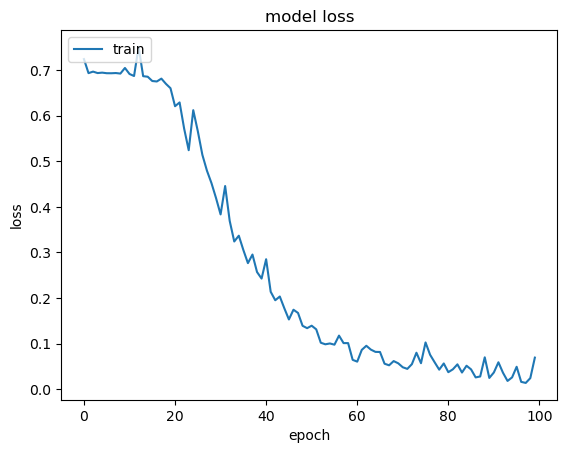

In [541]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
#plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Training for 100 epochs showed that the model was previously stuck in a local minima when I trained it for 10 epochs. 
After training the model for 100 epochs, the accuracy of the model increased significantly.

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Accuracy: 0.8765957446808511
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       137
           1       0.82      0.91      0.86        98

    accuracy                           0.88       235
   macro avg       0.87      0.88      0.87       235
weighted avg       0.88      0.88      0.88       235

Confusion Matrix:
 [[117  20]
 [  9  89]]


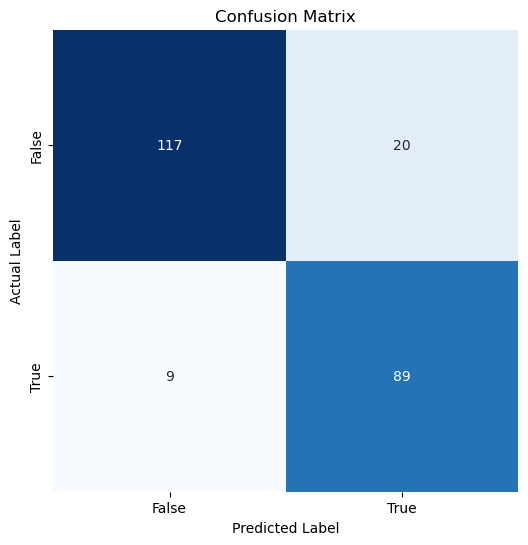

In [542]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Generate predictions
pred_CNN = model_CNN.predict(test_data)
pred_CNN = np.argmax(pred_CNN, axis=1)  # Convert probabilities to class labels

#Get the true labels from the test data
Y_test_CNN = test_data.classes  # Ensure this is the correct way to access the true labels

#Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test_CNN, pred_CNN)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test_CNN, pred_CNN))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test_CNN, pred_CNN)
print("Confusion Matrix:\n", conf_matrix)

#Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# RESNet

In [544]:
import cv2
import numpy as np
import os
from tensorflow.keras.applications import resnet50,ResNet50
from tensorflow.keras.preprocessing import image

In [545]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(100,100,3))

In [546]:
Y_train = []
X_train = []

# 2 for loop, 1 for classes and 1 for images in the class
for i in os.listdir(train): #for class
  for j in os.listdir(train +'/'+i+"/"):
    print(train +'/'+i+'/'+j)
    img=cv2.imread(train +'/'+i+'/'+j)
    img=cv2.resize(img,(100, 100))
    img = image.img_to_array(img) 
    img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis=0))
    img = model.predict(img)
    X_train.append(img.flatten())        
    Y_train.append(i)

emotion (sad and happy)/train/Happy/0b029961434f74b7016c242764d1e14834a2774d784ed1a33e72494c.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
emotion (sad and happy)/train/Happy/0b052077556e295064a937db8d10cf6970818952bc9803d45e7f5ae4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
emotion (sad and happy)/train/Happy/0b1076789261f58a089e5c25c9060b315b7362da0baff21ccb7d4681.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
emotion (sad and happy)/train/Happy/0b294803fdf29b1ddc55cfd970504101ce19693cbf9f3b82d2dc3007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
emotion (sad and happy)/train/Happy/0b304133badf8d78e13650c4647332903b6f9baabf8c1ae46ac733df.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
emotion (sad and happy)/train/Happy/0b4809865b6fb8f5e0ee8233f79368dc3dc357e117e76b763ab488a9.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
emotion (sad and happy)/train/Happy/0b485722244f463b264a0e6126442baf58309beb664bfb07adb7deec.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
emotion (sad and happy)/train/Happy/0b511671190a9918bd86

In [547]:
Y_test = []
X_test = []

# 2 for loop, 1 for classes and 1 for images in the class
for i in os.listdir(test): #for class
  for j in os.listdir(test +'/'+i+"/"):
    print(test +'/'+i+'/'+j)
    img=cv2.imread(test +'/'+i+'/'+j)
    img=cv2.resize(img,(100, 100))
    img = image.img_to_array(img) 
    img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis=0))
    img = model.predict(img)
    X_test.append(img.flatten())        
    Y_test.append(i)

emotion (sad and happy)/test/Happy/0c0724436a90e5639ad223c8f293fefa311b318e19638f00e8cd767b.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
emotion (sad and happy)/test/Happy/0c0771364a5b91c7b19c29e7b82aa86635772163023d8bbc778ee992.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
emotion (sad and happy)/test/Happy/0c08c87df7d57afc62bde15f76f5d957909bbcb87cc77289ec562e09.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
emotion (sad and happy)/test/Happy/0c102c04b9500d77c5b2d12050ff4cd5793d4f4ddb1e6bc25550ec1f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
emotion (sad and happy)/test/Happy/0c10b9eb51737fc5ae2eeaf7267924bdefb290c96ef0d99066dff56f.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
emotion (sad and happy)/test/Happy/0c10e72f77ec1ce92f43cc97a85e774f920d48ad25dc4f381cf6942a.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
emotion (sad and happy)/test/Happy/0c11bdfb0801cb0d9b9d208741691c63e4d37de51aa7d35916a7263f.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
emotion (sad and happy)/test/Happy/0c127242d73241bfb32e52b6023

In [548]:
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
model = linear_model.LogisticRegression(max_iter=5000).fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.825531914893617


Accuracy: 0.825531914893617
Classification Report:
               precision    recall  f1-score   support

       Happy       0.84      0.87      0.85       137
         Sad       0.81      0.77      0.79        98

    accuracy                           0.83       235
   macro avg       0.82      0.82      0.82       235
weighted avg       0.82      0.83      0.82       235

Confusion Matrix:
 [[119  18]
 [ 23  75]]


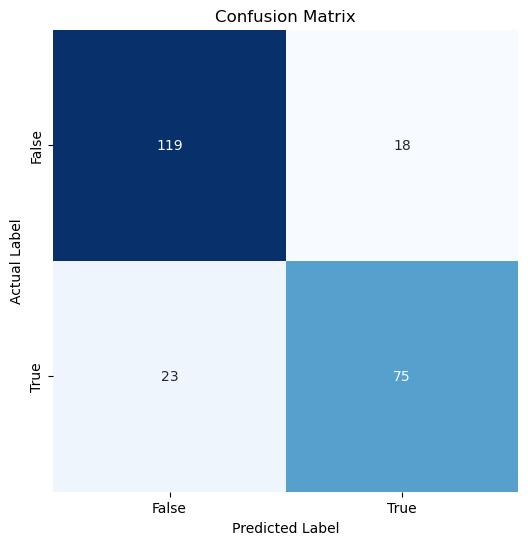

In [564]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generate predictions
model = linear_model.LogisticRegression(max_iter=5000).fit(X_train, Y_train)
pred = model.predict(X_test)

#Classification Metrics

# Accuracy
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

# Detailed Classification Report
print("Classification Report:\n", classification_report(Y_test, pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, pred)
print("Confusion Matrix:\n", conf_matrix)

#Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

The CNN model performed better than the RESNet model with higher overall accuracy